## Problem Statement

Build a regression model to predict a selling price for the used car.

## Hypothesis
Year: Higher the number of years used, lower the selling price<br>
transmission: Automatic cars sells at higher prices.<br>
mileage: more the distance less the selling price<br>
mpg: higher the miles per gallon, higher the selling price<br>

In [53]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy

%matplotlib inline
# pd.options.plotting.backend='plotly'

### Import data

In [42]:
df = pd.read_csv(r'./data/all_car_listings.csv')

# Data preprocessing
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
df['no_of_years_used'] = datetime.now().year - df['year']

# Cols
numerical_cols = ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'no_of_years_used']
nominal_cols = ['brand', 'transmission', 'fuelType']
target_col= ['price']

# Type coversion
df[nominal_cols] = df[nominal_cols].astype('category')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,no_of_years_used
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,3
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,4
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,3
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,1


# EDA

<b> EDA Findings </b>

<b> Numerical variables </b>
    <li> All the variables are skewed </li>
    <li> In Mileage we have a extreme value (30000+) </li>
    <li> Tax is multi modal with extreme value in both upper(500-600) and lower bound (0-50) </li>
    <li> MPG has extreme values from 125+ </li>
    <li> Engine size is multimodal </li>
    <li> Num of years used is multi modal with extreme value of 20+ year </li>
    
 <b>Categorical Variables</b>
    <li>Listing of automatic vehicles are less compared to semi-auto and manual</li>
    <li>Hybrid fuel varient is extremely less compared to Disel and petrol.</li>

### Univariate analysis - Numerical

**********Variable: price**********

Descriptive stats:
  count    108540.000000
mean      16890.124046
std        9756.266820
min         450.000000
25%       10229.500000
50%       14698.000000
75%       20940.000000
max      159999.000000
Name: price, dtype: float64

Skewness:
  2.29172046892899


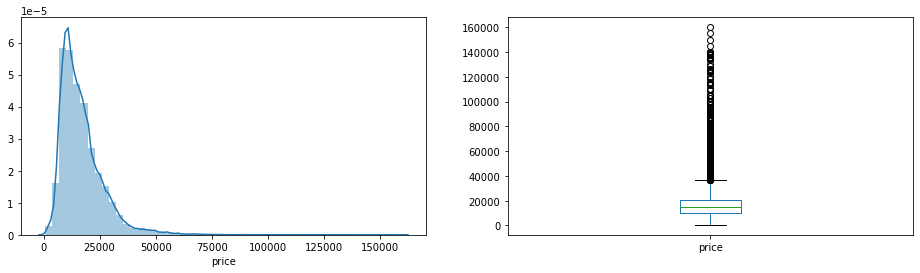

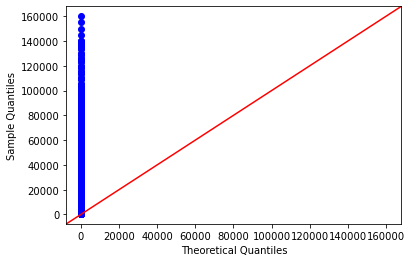

**********Variable: mileage**********

Descriptive stats:
  count    108540.000000
mean      23025.928469
std       21176.423684
min           1.000000
25%        7491.750000
50%       17265.000000
75%       32236.000000
max      323000.000000
Name: mileage, dtype: float64

Skewness:
  1.7996494425446896


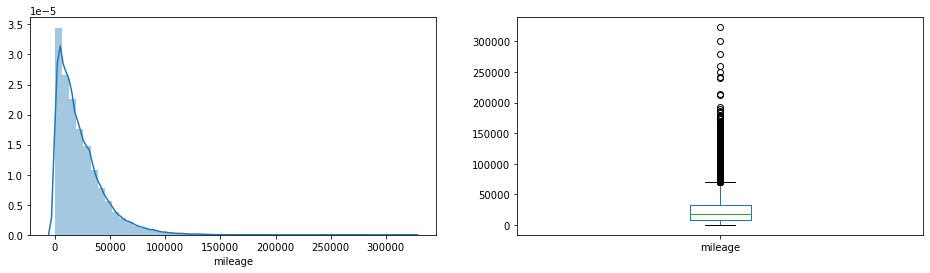

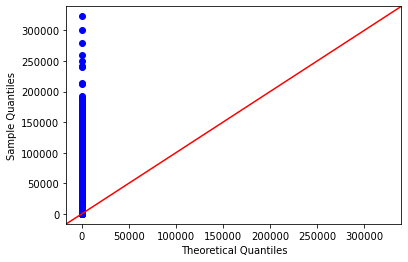

**********Variable: tax**********

Descriptive stats:
  count    99187.000000
mean       120.299838
std         63.150926
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

Skewness:
  0.027149598233683358


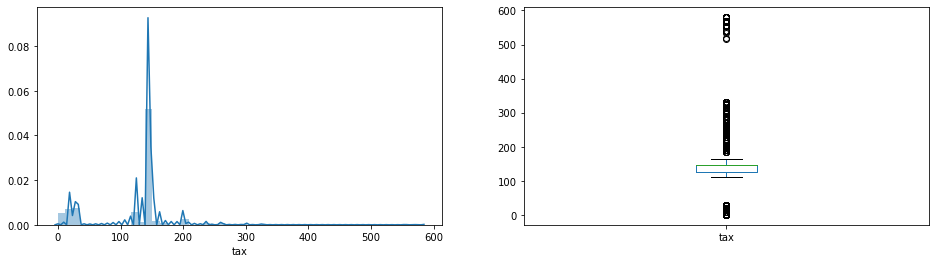

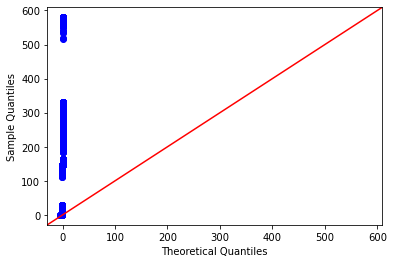

**********Variable: mpg**********

Descriptive stats:
  count    99187.000000
mean        55.166825
std         16.138522
min          0.300000
25%         47.100000
50%         54.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64

Skewness:
  8.936497596034545


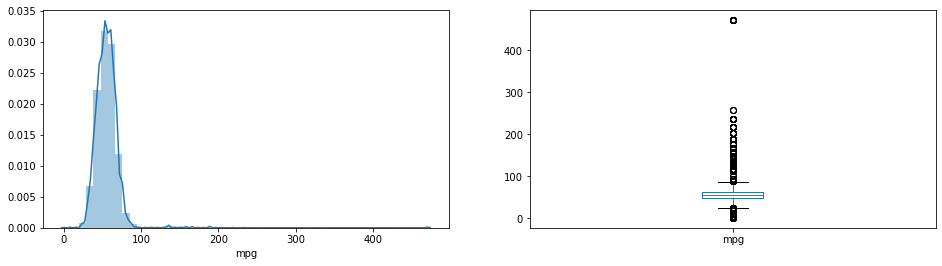

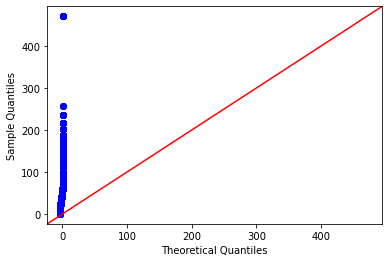

**********Variable: engineSize**********

Descriptive stats:
  count    108540.000000
mean          1.661644
std           0.557058
min           0.000000
25%           1.200000
50%           1.600000
75%           2.000000
max           6.600000
Name: engineSize, dtype: float64

Skewness:
  1.3142192740067973


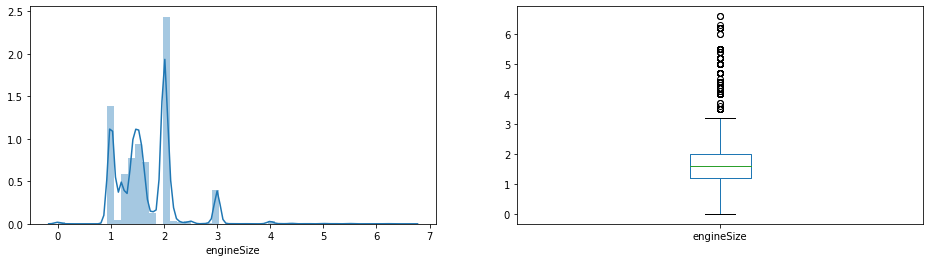

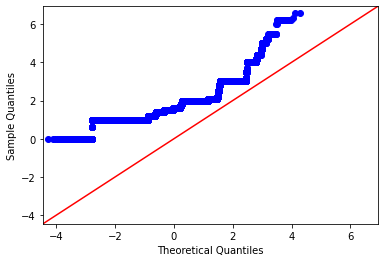

**********Variable: no_of_years_used**********

Descriptive stats:
  count    108540.000000
mean          2.901972
std           2.130057
min         -40.000000
25%           1.000000
50%           3.000000
75%           4.000000
max          50.000000
Name: no_of_years_used, dtype: float64

Skewness:
  1.9353446129089054


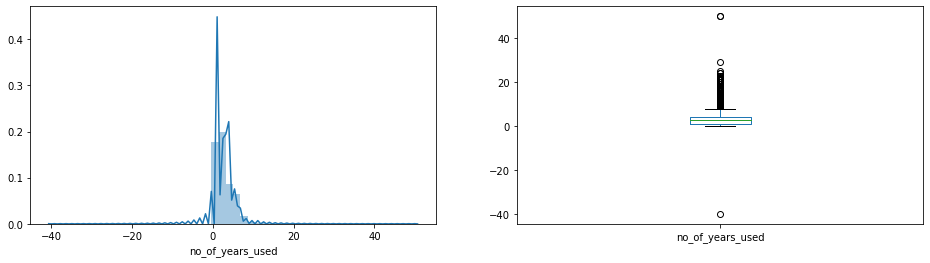

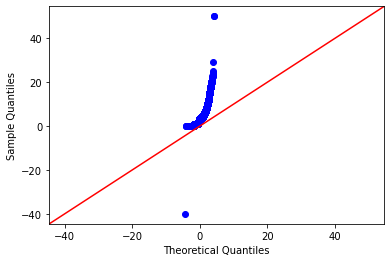

In [43]:
for col in numerical_cols:
    print("*"*10 + 'Variable: {}'.format(col) + "*"*10)
    
    # Desriptive stats
    print("\nDescriptive stats:\n ", df[col].describe())
    print("\nSkewness:\n ", df[col].skew())
    
    # Init
    plt.figure(1, figsize=(16,4))
    plt.subplot(1,2,1)
    
    # Distplot
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    
    # Box plot
    df[col].plot(kind='box')
    
    # Q-Q plot
    sm.qqplot(df[col], line='45')
    
    # plot setup
    plt.show()
    plt.tight_layout()
    plt.close()

### Univariate analysis - Categorical

**********Variable: brand**********
ford        0.165515
vw          0.139644
vauxhall    0.125594
merc        0.120868
bmw         0.099327
audi        0.098286
toyota      0.062078
skoda       0.057739
focus       0.050249
hyundi      0.044776
cclass      0.035922
Name: brand, dtype: float64


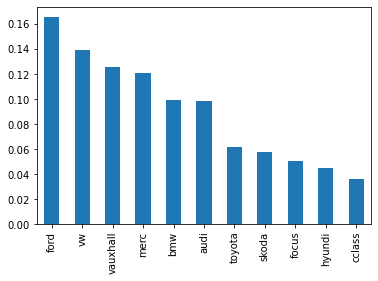

**********Variable: transmission**********
Manual       0.564842
Semi-Auto    0.229436
Automatic    0.205629
Other        0.000092
Name: transmission, dtype: float64


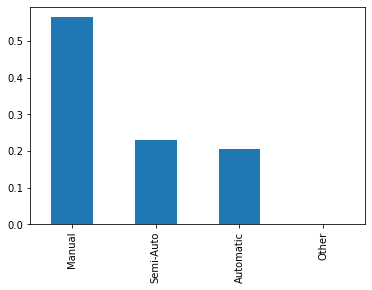

**********Variable: fuelType**********
Petrol      0.551640
Diesel      0.416224
Hybrid      0.029749
Other       0.002331
Electric    0.000055
Name: fuelType, dtype: float64


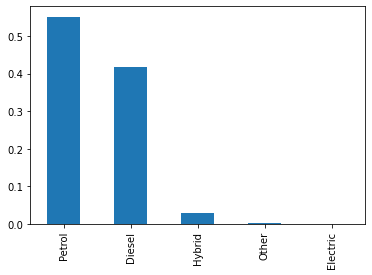

In [44]:
for col in nominal_cols:
    print("*"*10 + 'Variable: {}'.format(col) + "*"*10)
    
    # Frequency table
    print(df[col].value_counts(normalize=True))
    
    # Bar plot
    df[col].value_counts(normalize=True).plot.bar()
    
    # plot setup
    plt.show()
    plt.close()

### Bivariate analysis - Continuos ~ Continuous

Analysis between price & mileage
-0.42794430039292103 0.0
-0.42794430039292103 0.0


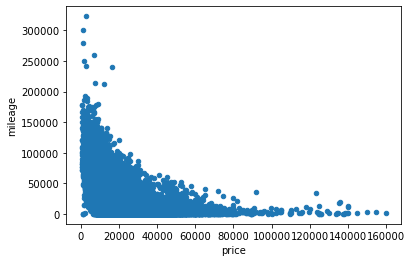

Analysis between price & tax
nan 1.0
nan 1.0


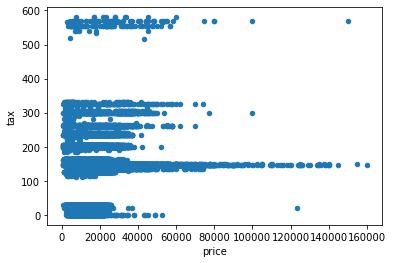

Analysis between price & mpg
nan 1.0
nan 1.0


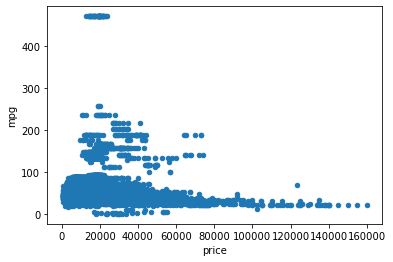

Analysis between price & engineSize
0.6315800634504269 0.0
0.6315800634504269 0.0


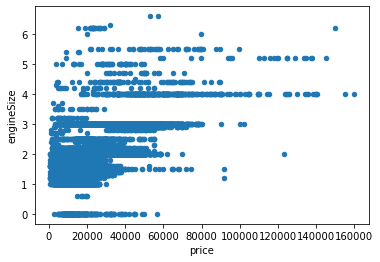

Analysis between price & no_of_years_used
-0.49709429495230273 0.0
-0.49709429495230273 0.0


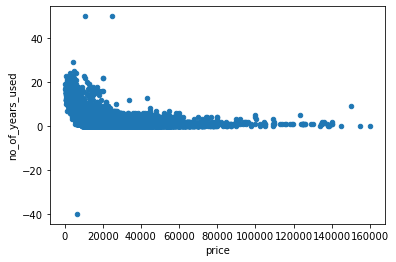

Analysis between mileage & tax
nan 1.0
nan 1.0


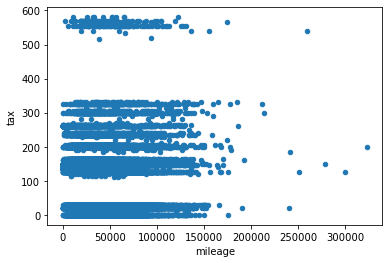

Analysis between mileage & mpg
nan 1.0
nan 1.0


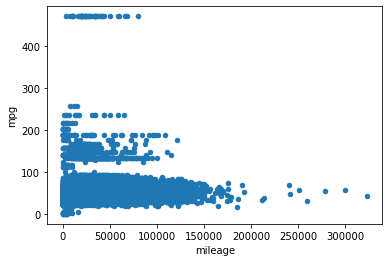

Analysis between mileage & engineSize
0.10824575041076098 3.635992893045305e-280
0.10824575041076098 3.635992893045305e-280


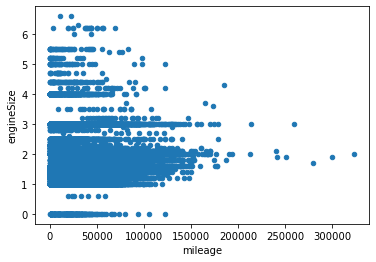

Analysis between mileage & no_of_years_used
0.7434545620787708 0.0
0.7434545620787708 0.0


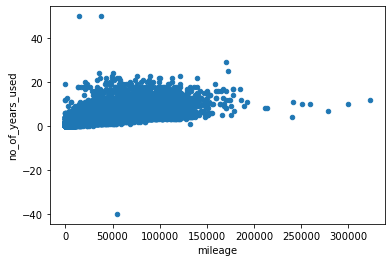

Analysis between tax & mpg
nan 1.0
nan 1.0


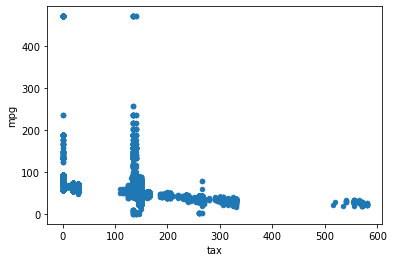

Analysis between tax & engineSize
nan 1.0
nan 1.0


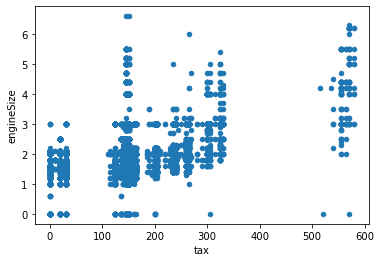

Analysis between tax & no_of_years_used
nan 1.0
nan 1.0


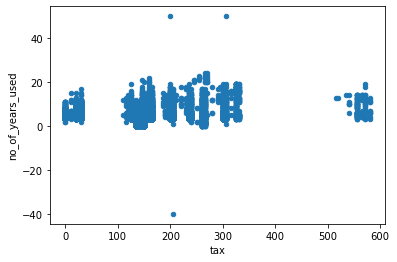

Analysis between mpg & engineSize
nan 1.0
nan 1.0


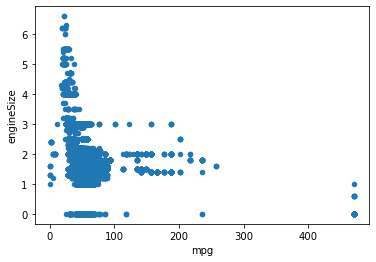

Analysis between mpg & no_of_years_used
nan 1.0
nan 1.0


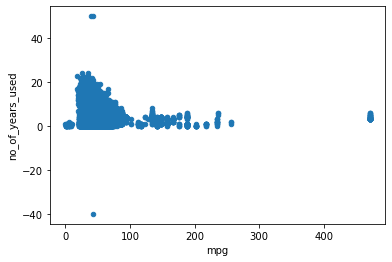

Analysis between engineSize & no_of_years_used
0.044891335907124345 1.5333785790246234e-49
0.044891335907124345 1.5333785790246234e-49


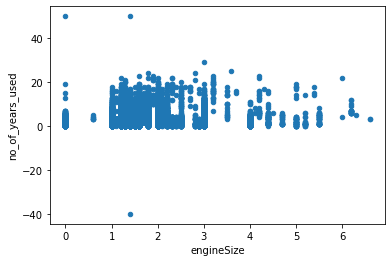

In [94]:
# Init
pvalue_matrix = pd.DataFrame(index=numerical_cols, columns=numerical_cols)

for cols in list(combinations(numerical_cols, 2)):  
    # Init
    x,y = cols
    print("Analysis between {} & {}".format(x,y))
    
    # Correlation and significance test
    pearson_coeff, p_value =scipy.stats.pearsonr(df[x], df[y])
    print(pearson_coeff, p_value)
    pearson_coeff, p_value =scipy.stats.pearsonr(df[x], df[y])
    print(pearson_coeff, p_value)
    
    # Update matrix
    pvalue_matrix.loc[x, y] = p_value
    pvalue_matrix.loc[y, x] = p_value
    
    # Scatter plot
    df.plot.scatter(x, y)
    
    # plot setup
    plt.show()
    plt.close()    

In [96]:
print("Pearson Correlation Matrix")
df[numerical_cols].corr()

Pearson Correlation Matrix


,price,mileage,tax,mpg,engineSize,no_of_years_used
price,1.000000,-0.427944,0.307648,-0.296429,0.631580,-0.497094
mileage,-0.427944,1.000000,-0.220761,0.185657,0.108246,0.743455
tax,0.307648,-0.220761,1.000000,-0.451451,0.278411,-0.195693
mpg,-0.296429,0.185657,-0.451451,1.000000,-0.248210,0.132791
engineSize,0.631580,0.108246,0.278411,-0.248210,1.000000,0.044891
no_of_years_used,-0.497094,0.743455,-0.195693,0.132791,0.044891,1.000000


In [97]:
print("Significant Matrix")
pvalue_matrix

Significant Matrix


,price,mileage,tax,mpg,engineSize,no_of_years_used
price,NaN,0,1,1,0,0
mileage,0,NaN,1,1,3.63599e-280,0
tax,1,1,NaN,1,1,1
mpg,1,1,1,NaN,1,1
engineSize,0,3.63599e-280,1,1,NaN,1.53338e-49
no_of_years_used,0,0,1,1,1.53338e-49,NaN


### Hypothesis

In [ ]:
df.plot.scatter(x='no_of_years_used', y='price', width=800, height=400)

In [ ]:
df.plot.scatter(x='mpg', y='price')